# BasicTauHybridSolver

In [1]:
%load_ext autoreload

%autoreload 2

### Imports

In [2]:
import sys
import os
import numpy 
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver

2019-08-31 00:30:20,813 - root - WARNING -  Unable to use NumPy: import * only allowed at module level (ssa_solver.py, line 14). The performance of this package can be significantly increased if you install NumPy.


SyntaxError: import * only allowed at module level (ssa_solver.py, line 14)

### Model Instantiation

Model must include rates, species, and reactions

In [4]:
import gillespy2
from gillespy2.core.events import *

class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))     
        
            
            #event assignment
            assignment1 = EventAssignment(name="assignment1", assignment_expression="A = 0",
                                                          value=None)

            assignment2 = EventAssignment(name="assignment2", assignment_expression="rate3 = 0.5",
                                                          value=None)

            #event trigger
            trigger1 =  EventTrigger( name="trigger1", trigger_expression="current_time > 75 and current_time < 76 ",
                                               value=None,initial_value = False, persistent = False)
            # I don't understand how persistent works. InitialValue false means event can trigger at t = 0

            #event delay
            delay1 =  EventDelay( name="delay1", delay_expression="5", value=None)

            #events
            event1 =  Event(name="event1", delay = delay1,
                                    listOfevent_assignments = [assignment1,assignment2], 
                                     priority_expression=None, value=None, event_trigger = trigger1)


            self.add_event(event1)
            

In [5]:
model = MichaelisMenten()

### Run Model and plot

In [6]:
%time results = model.run(solver=NumPySSASolver())

NameError: name 'NumPySSASolver' is not defined

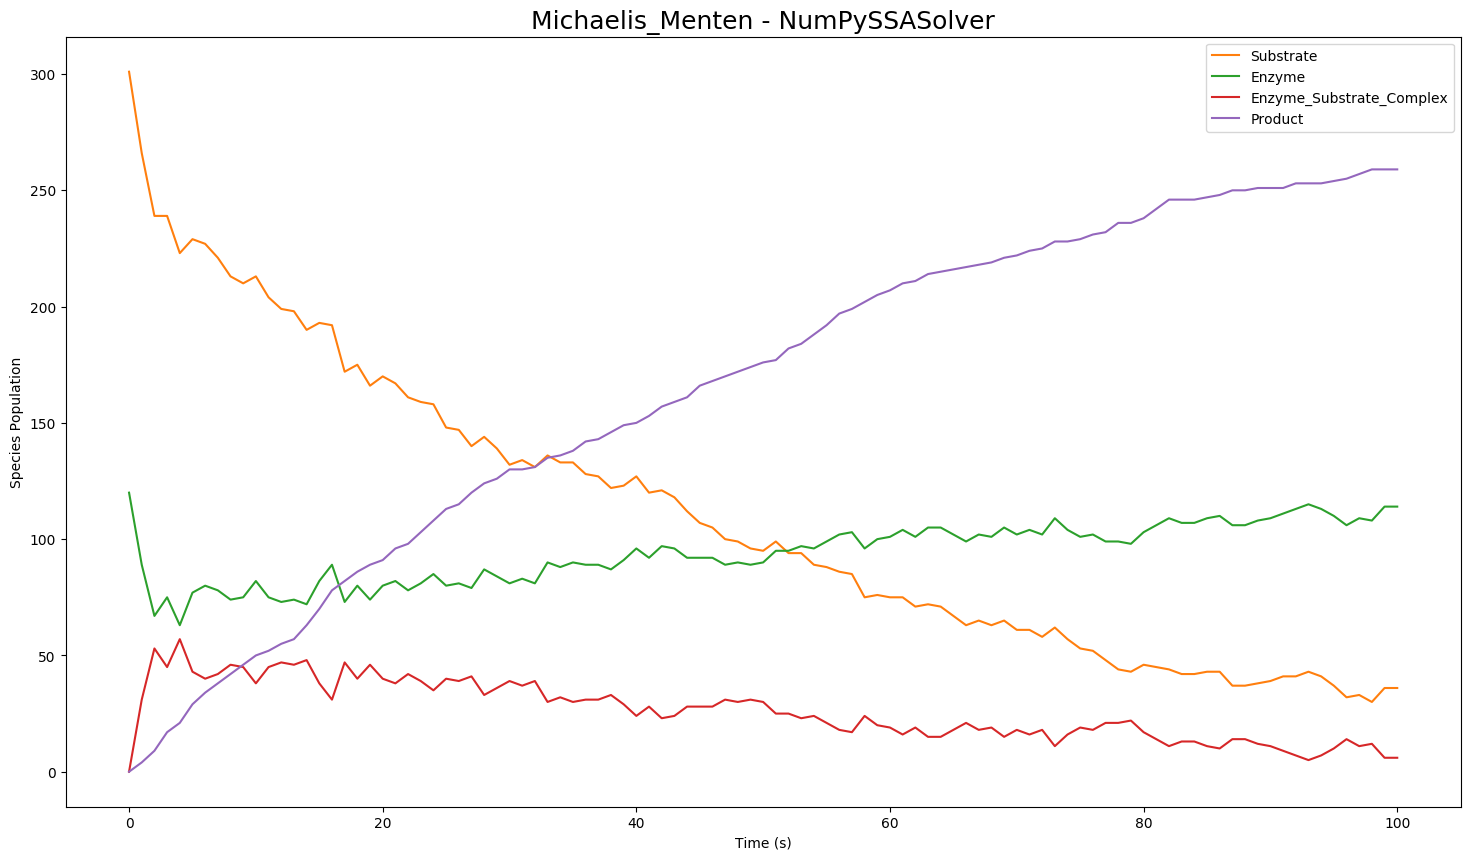

In [27]:
results.plot()